In [ ]:
pip install pandas nltk Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.8 MB/s eta 0:00:00


In [ ]:
# 1. Import library
import pandas as pd
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
import nltk

# 2. Download stopwords Bahasa Indonesia
nltk.download('stopwords')

# 3. Load data
df = pd.read_csv('data.mobil.tesla.csv')

# 4. Inisialisasi Stemmer dan Stopwords Bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()
stop_words = set(stopwords.words('indonesian'))

# 5. Cleaning
def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+a href", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

# 6. Case Folding
def case_folding(text):
    return text.lower()

# 7. Tokenization (gunakan split manual, bukan NLTK)
def tokenize(text):
    return text.split()

# 8. Stemming
def stem_words(tokens):
    return [stemmer.stem(word) for word in tokens]

# 9. Stopword Removal
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# 10. Pipeline Preprocessing
df['cleaned'] = df['textDisplay'].apply(clean_text)
df['lower'] = df['cleaned'].apply(case_folding)
df['tokens'] = df['lower'].apply(tokenize)
df['stemmed'] = df['tokens'].apply(stem_words)
df['filtered'] = df['stemmed'].apply(remove_stopwords)
df['preprocessed'] = df['filtered'].apply(lambda x: ' '.join(x))

# 11. Tampilkan hasil preprocessing
preprocessed_table = df[['textDisplay', 'cleaned', 'lower', 'tokens', 'stemmed', 'filtered', 'preprocessed']]
pd.set_option('display.max_colwidth', None)
preprocessed_table.head(10)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,textDisplay,cleaned,lower,tokens,stemmed,filtered,preprocessed
0,Aku sih masih senang mobil-mobil yang Presentatif dari bentuk dan inovasnya dari perkembangan teknologi saat ini itulah intinya sih Bro and Bray. 😊 😅 😂,Aku sih masih senang mobilmobil yang Presentatif dari bentuk dan inovasnya dari perkembangan teknologi saat ini itulah intinya sih Bro and Bray,aku sih masih senang mobilmobil yang presentatif dari bentuk dan inovasnya dari perkembangan teknologi saat ini itulah intinya sih bro and bray,"[aku, sih, masih, senang, mobilmobil, yang, presentatif, dari, bentuk, dan, inovasnya, dari, perkembangan, teknologi, saat, ini, itulah, intinya, sih, bro, and, bray]","[aku, sih, masih, senang, mobilmobil, yang, presentatif, dari, bentuk, dan, inovasnya, dari, kembang, teknologi, saat, ini, itu, inti, sih, bro, and, bray]","[sih, senang, mobilmobil, presentatif, bentuk, inovasnya, kembang, teknologi, inti, sih, bro, and, bray]",sih senang mobilmobil presentatif bentuk inovasnya kembang teknologi inti sih bro and bray
1,Yang 7seater adakah? Kalay diisi penuh oramg dewasa bisa.kan ya?? Soalnya kalau mobil bensin solar kan bisa,Yang seater adakah Kalay diisi penuh oramg dewasa bisakan ya Soalnya kalau mobil bensin solar kan bisa,yang seater adakah kalay diisi penuh oramg dewasa bisakan ya soalnya kalau mobil bensin solar kan bisa,"[yang, seater, adakah, kalay, diisi, penuh, oramg, dewasa, bisakan, ya, soalnya, kalau, mobil, bensin, solar, kan, bisa]","[yang, seater, ada, kalay, isi, penuh, oramg, dewasa, bisa, ya, soal, kalau, mobil, bensin, solar, kan, bisa]","[seater, kalay, isi, penuh, oramg, dewasa, ya, mobil, bensin, solar]",seater kalay isi penuh oramg dewasa ya mobil bensin solar
2,Di enzenering BSD bkn ya lokasinya😅,Di enzenering BSD bkn ya lokasinya,di enzenering bsd bkn ya lokasinya,"[di, enzenering, bsd, bkn, ya, lokasinya]","[di, enzenering, bsd, bkn, ya, lokasi]","[enzenering, bsd, bkn, ya, lokasi]",enzenering bsd bkn ya lokasi
3,Loh kok platnya gak biru,Loh kok platnya gak biru,loh kok platnya gak biru,"[loh, kok, platnya, gak, biru]","[loh, kok, platnya, gak, biru]","[loh, platnya, gak, biru]",loh platnya gak biru
4,teknologi mobil listrik sudah berkembang pesat. sekarang tahun 2024.,teknologi mobil listrik sudah berkembang pesat sekarang tahun,teknologi mobil listrik sudah berkembang pesat sekarang tahun,"[teknologi, mobil, listrik, sudah, berkembang, pesat, sekarang, tahun]","[teknologi, mobil, listrik, sudah, kembang, pesat, sekarang, tahun]","[teknologi, mobil, listrik, kembang, pesat]",teknologi mobil listrik kembang pesat
5,Jarak jauh kaki pegel bisa kram kaki,Jarak jauh kaki pegel bisa kram kaki,jarak jauh kaki pegel bisa kram kaki,"[jarak, jauh, kaki, pegel, bisa, kram, kaki]","[jarak, jauh, kaki, gel, bisa, kram, kaki]","[jarak, kaki, gel, kram, kaki]",jarak kaki gel kram kaki
6,kalo rusak ke tabrak nagis perbakinya,kalo rusak ke tabrak nagis perbakinya,kalo rusak ke tabrak nagis perbakinya,"[kalo, rusak, ke, tabrak, nagis, perbakinya]","[kalo, rusak, ke, tabrak, nagis, bak]","[kalo, rusak, tabrak, nagis, bak]",kalo rusak tabrak nagis bak
7,Astaga mengkilatnya👍👍,Astaga mengkilatnya,astaga mengkilatnya,"[astaga, mengkilatnya]","[astaga, kilat]","[astaga, kilat]",astaga kilat
8,Hati2 kalu belum paham mobil ini ngeri2 sedap ...serba digital,Hati kalu belum paham mobil ini ngeri sedap serba digital,hati kalu belum paham mobil ini ngeri sedap serba digital,"[hati, kalu, belum, paham, mobil, ini, ngeri, sedap, serba, digital]","[hati, kalu, belum, paham, mobil, ini, ngeri, sedap, serba, digital]","[hati, kalu, paham, mobil, ngeri, sedap, serba, digital]",hati kalu paham mobil ngeri sedap serba digital
9,Saya kesini karna sekarang banyak sekali mobil listrik cina masuk ke indonesia kira&quot; gimana ya penjualan tesla sekarang dan kedepannya,Saya kesini karna sekarang banyak sekali mobil listrik cina masuk ke indonesia kiraquot gimana ya penjualan tesla sekarang dan kedepannya,saya kesini karna sekarang banyak seka

In [ ]:
# Tampilkan hasil setiap tahap preprocessing
print("=== Cleaning ===")
display(df[['textDisplay', 'cleaned']].head())

print("=== Case Folding ===")
display(df[['cleaned', 'lower']].head())

print("=== Tokenization ===")
display(df[['lower', 'tokens']].head())

print("=== Stemming ===")
display(df[['tokens', 'stemmed']].head())

print("=== Stopword Removal ===")
display(df[['stemmed', 'filtered']].head())

print("=== Final Preprocessed Text ===")
display(df[['filtered', 'preprocessed']].head())


=== Cleaning ===


,textDisplay,cleaned
0,Aku sih masih senang mobil-mobil yang Presenta...,Aku sih masih senang mobilmobil yang Presentat...
1,Yang 7seater adakah? Kalay diisi penuh oramg d...,Yang seater adakah Kalay diisi penuh oramg dew...
2,Di enzenering BSD bkn ya lokasinyað,Di enzenering BSD bkn ya lokasinya
3,Loh kok platnya gak biru,Loh kok platnya gak biru
4,teknologi mobil listrik sudah berkembang pesat...,teknologi mobil listrik sudah berkembang pesat...


=== Case Folding ===


,cleaned,lower
0,Aku sih masih senang mobilmobil yang Presentat...,aku sih masih senang mobilmobil yang presentat...
1,Yang seater adakah Kalay diisi penuh oramg dew...,yang seater adakah kalay diisi penuh oramg dew...
2,Di enzenering BSD bkn ya lokasinya,di enzenering bsd bkn ya lokasinya
3,Loh kok platnya gak biru,loh kok platnya gak biru
4,teknologi mobil listrik sudah berkembang pesat...,teknologi mobil listrik sudah berkembang pesat...


=== Tokenization ===


,lower,tokens
0,aku sih masih senang mobilmobil yang presentat...,"['aku', 'sih', 'masih', 'senang', 'mobilmobil'..."
1,yang seater adakah kalay diisi penuh oramg dew...,"['yang', 'seater', 'adakah', 'kalay', 'diisi',..."
2,di enzenering bsd bkn ya lokasinya,"['di', 'enzenering', 'bsd', 'bkn', 'ya', 'loka..."
3,loh kok platnya gak biru,"['loh', 'kok', 'platnya', 'gak', 'biru']"
4,teknologi mobil listrik sudah berkembang pesat...,"['teknologi', 'mobil', 'listrik', 'sudah', 'be..."


=== Stemming ===


,tokens,stemmed
0,"['aku', 'sih', 'masih', 'senang', 'mobilmobil'...","['aku', 'sih', 'masih', 'senang', 'mobilmobil'..."
1,"['yang', 'seater', 'adakah', 'kalay', 'diisi',...","['yang', 'seater', 'ada', 'kalay', 'isi', 'pen..."
2,"['di', 'enzenering', 'bsd', 'bkn', 'ya', 'loka...","['di', 'enzenering', 'bsd', 'bkn', 'ya', 'loka..."
3,"['loh', 'kok', 'platnya', 'gak', 'biru']","['loh', 'kok', 'platnya', 'gak', 'biru']"
4,"['teknologi', 'mobil', 'listrik', 'sudah', 'be...","['teknologi', 'mobil', 'listrik', 'sudah', 'ke..."


=== Stopword Removal ===


,stemmed,filtered
0,"['aku', 'sih', 'masih', 'senang', 'mobilmobil'...","['sih', 'senang', 'mobilmobil', 'presentatif',..."
1,"['yang', 'seater', 'ada', 'kalay', 'isi', 'pen...","['seater', 'kalay', 'isi', 'penuh', 'oramg', '..."
2,"['di', 'enzenering', 'bsd', 'bkn', 'ya', 'loka...","['enzenering', 'bsd', 'bkn', 'ya', 'lokasi']"
3,"['loh', 'kok', 'platnya', 'gak', 'biru']","['loh', 'platnya', 'gak', 'biru']"
4,"['teknologi', 'mobil', 'listrik', 'sudah', 'ke...","['teknologi', 'mobil', 'listrik', 'kembang', '..."


=== Final Preprocessed Text ===


,filtered,preprocessed
0,"['sih', 'senang', 'mobilmobil', 'presentatif',...",sih senang mobilmobil presentatif bentuk inova...
1,"['seater', 'kalay', 'isi', 'penuh', 'oramg', '...",seater kalay isi penuh oramg dewasa ya mobil b...
2,"['enzenering', 'bsd', 'bkn', 'ya', 'lokasi']",enzenering bsd bkn ya lokasi
3,"['loh', 'platnya', 'gak', 'biru']",loh platnya gak biru
4,"['teknologi', 'mobil', 'listrik', 'kembang', '...",teknologi mobil listrik kembang pesat


In [ ]:
# Simpan ke file baru
df.to_csv('data.mobil.preprocessed.csv', index=False)

In [ ]:
import pandas as pd

# Load data hasil preprocessing (pastikan sudah punya kolom 'preprocessed')
df = pd.read_csv("data.mobil.preprocessed.csv")

# Definisikan kata kunci per aspek
aspek_keywords = {
    'performa': [ 'performa', 'tenaga', 'kecepatan', 'akselerasi', 'power', 'performance',
    'kencang', 'cepat', 'tarikan', 'responsif', 'torsi', 'top speed',
    'horsepower', 'rpm', 'daya', 'mesin', 'powertrain', 'engine', 'bertenaga',
    'drivetrain', 'percepatan', 'efisiensi tenaga', 'penggerak', 'pengendalian',
    'kickdown', 'sport mode', 'throttle', 'turbo', 'supercharger',
    'engine power', 'dynamic', 'agility', 'engine sound', 'stabilitas',
    'kecepatan tinggi', 'manuver', 'pengemudian agresif', 'sporty', 'fast lane',
    'torque', 'tenaga maksimal', 'maximum power', 'boost', 'respons akselerasi',
    'powerful', 'high rev', 'pembakaran optimal', 'engine performance',
    'penggerak roda', 'pengendalian cepat', 'rpm tinggi', 'high speed',
    'lonjakan tenaga', 'drift', 'launch control', 'handling', 'roda cepat',
    'fast acceleration', 'energi kinetik', 'traksi', 'responsive throttle',
    'motor listrik', 'pengiriman tenaga', 'speed boost', 'performa optimal',
    'engine response', 'rasio gigi', 'efisiensi mesin', 'kinerja mesin',
    'kinerja tinggi', 'tenaga instan', 'drive mode', 'mobil cepat',
    'tenaga besar', 'kinerja luar biasa', 'kekuatan mesin', 'motor power',
    'road performance', 'tenaga kuda', 'pengalaman berkendara', 'speed burst',
    'energi tinggi', 'mobil kencang', 'pengereman cepat', 'akselerasi instan',
    'responsive driving', 'quick shift', 'dynamic performance',
    'tenaga responsif', 'tenaga dorong', 'speed stability', 'boost mode',
    'mobil lincah', 'power surge', 'tenaga ekstra', 'speed handling',
    'tenaga dorongan', 'sport suspension', 'turbocharged', 'gear shifting',
    'drive force', 'mobil gesit', 'kecepatan akselerasi', 'acceleration time',
    'tenaga optimal', 'daya dorong', 'gearbox responsif', 'kick start',
    'sport drive', 'kinerja cepat', 'high torque', 'low-end torque',
    'tenaga mendadak', 'speed mode', 'tenaga full', 'penuh tenaga', 'engine kick',
    'peak performance', 'throttle response', 'stabil di kecepatan tinggi',
    'drive quality', 'gear rasio pendek', 'engine pickup', 'roda penggerak',
    'high output', 'torque curve', 'high-end power', 'raw power',
    'instant torque', 'EV performance', 'g-force', 'engine delivery',
    'engine output', 'energi dorong', 'boost response', 'pengiriman akselerasi',
    'engine smoothness', 'zero lag', 'EV tenaga', 'raw acceleration',
    'torque burst', 'mobil responsif', 'shifting cepat', 'engine balance',
    'paddle shift', 'automatic performance', 'drive dynamics',
    'persistence power', 'engine torque', 'mobil sport', 'track mode',
    'speed gain', 'top gear', 'acceleration boost', 'handling cepat',
    'quick launch', 'electric motor torque', 'driving feel', 'quick pick-up',
    'kecepatan dorong', 'control speed', 'speedy', 'smooth acceleration',
    'auto throttle', 'track performance', 'motor akselerasi', 'gigi pendek',
    'respon mesin', 'speed runner', 'drive responsiveness', 'speed climb',
    'tenaga terus menerus', 'drive boost', 'speedy motor', 'high-performance',
    'mesin halus', 'acceleration punch', 'EV boost', 'gear acceleration',
    'stabil akselerasi', 'tenaga tanpa delay', 'kendali kecepatan',
    'EV kecepatan tinggi', 'power burst', 'bobot ringan', 'kontrol kecepatan',
    'kemampuan melaju', 'lonjakan kecepatan', 'performa mengagumkan',
    'drive acceleration', 'engine kecepatan', 'EV agility', 'speed thrill',
    'kekuatan dorong', 'acceleration ramp', 'race performance', 'kecepatan reaksi', 'ngebut', 'gaspoll', 'ngebut banget', 'kenceng', 'kenceng parah', 'laju banget',
    'lincah', 'lincah bener', 'tenaganya gokil', 'narik banget', 'narik parah',
    'enteng banget', 'enteng tarikannya', 'enteng gasnya', 'gampang di gas',
    'cepet banget', 'gak pake lama', 'tancap gas', 'gak lemot', 'gak lelet', 'gak berat',
    'tarikannya mantep', 'tarikan enak', 'tarikan halus', 'ngacir', 'ngacir abis',
    'bisa ngejar mobil lain', 'bisa nyalip terus', 'bisa ngibrit', 'langsung nyodok',
    'langsung melesat', 'langsung jalan', 'langsung ngacir', 'respon gas cepat',
    'akselerasi jos', 'akselerasi cepet', 'tenaganya galak', 'mesinnya galak',
    'mesin responsif', 'cepet respon', 'torsi gede', 'torsi berasa', 'gigi enteng',
    'gak berat naik tanjakan', 'nanjak enteng', 'gak ngos-ngosan', 'gak capek mesinnya',

    # Bahasa gaul / anak muda
    'kenceng beud', 'narik beud', 'ngacir beud', 'ngibrit gila', 'gila tarikannya',
    'gila tenaganya', 'edan mesinnya', 'cepet pol', 'ngacir pol', 'top speed mantap',
    'cepet sih ini', 'ngebut cuy', 'gaspoll abis', 'ngeblar', 'ngebut level dewa',
    'ngibrit parah', 'tenaganya sih ngeri', 'galak sih mesinnya', 'nendang banget',
    'berasa ditendang', 'langsung loncat', 'mesinnya lari', 'langsung ngibrit',
    'bisa kabur cepet', 'ngacir kayak setan', 'kaya roket', 'kaya jet', 'kaya pesawat',
    'langsung nyamber', 'aksel cepet', 'gaspoll gak pake mikir', 'ngebut serasa balap',
    'kayak F1', 'kayak drag race', 'nariknya ngeri sih', 'ngacir di tol', 'ngacir di tanjakan',
    'gigi loncat terus', 'responsnya oke', 'respons gila', 'respons ngebut',
    'reponsif beud', 'torsi sadis', 'tenaga buas', 'bisa geber terus', 'enak buat ngebut',

    # Bahasa kasar / ekspresif
    'ngacir anjing', 'kenceng gila', 'kenceng banget tai', 'ngacir babi', 'tarikannya bangsat',
    'langsung ngacir goblok', 'gaspoll edan', 'gaspoll setan', 'cepet mampus', 'ngebut setengah mati',
    'mesinnya brutal', 'mesinnya ngeri banget', 'mesin galak gila', 'tenaganya kaya binatang',
    'tarikannya kaya ditonjok', 'cepetnya kaya dikejar setan', 'cepet banget goblok',
    'nariknya gila sih', 'tenaga kaya gajah ngamuk', 'akselerasi kayak dibetot',
    'langsung nyelonong', 'langsung nyundul', 'langsung ngacir kayak dikejar polisi',
    'cepet kek setan', 'narik kek jin', 'tenaganya jahanam', 'tarikan jahanam',
    'mesin sadis', 'cepet kaya maling', 'ngacir kaya rampok', 'gaspoll kaya dukun',
    'langsung loncat kek ninja', 'langsung kabur kek tuyul', 'gak ada lawan tarikannya',
    'ngacir tanpa ampun', 'cepet parah bangke', 'langsung mental', 'langsung terbang',
    'cepetnya naudzubillah', 'tarikan bikin jantungan', 'tarikannya brutal',
    'bisa kejedot jok', 'langsung nancep', 'langsung jebret', 'gaspoll sampe gila',
    'tarikannya bar-bar', 'ngebutnya gak santai', 'mesinnya kaya kerasukan',
    'cepet kek kerasukan', 'kencengnya sadis', 'cepetnya ngeselin', 'gaspoll sampe jantungan'],

    'desain': [ 'desain', 'tampilan', 'eksterior', 'interior', 'gaya', 'body', 'bodi', 'model',
    'styling', 'warna', 'lekukan', 'dimensi', 'bentuk', 'aerodinamis', 'lampu',
    'grille', 'velg', 'roof', 'sunroof', 'panoramic', 'tail lamp', 'headlamp',
    'bumper', 'futuristik', 'modern', 'elegan', 'sporty', 'mevvah', 'minimalis',
    'streamline', 'keren', 'canggih', 'kekinian', 'berkelas', 'agresif', 'unik',
    'inovatif', 'luxury', 'dashboard', 'kabin', 'kursi', 'setir', 'ambient light',
    'material interior', 'layout', 'tampilan luar', 'fit and finish', 'tekstur',
    'futuristic look', 'daya tarik visual', 'roofline', 'pilar', 'lampu LED',
    'aksen krom', 'finishing', 'interior premium', 'warna interior', 'color scheme',
    'ergonomis', 'touchscreen dashboard', 'digital cluster', 'center console',
    'jok kulit', 'desain jok', 'cup holder', 'pencahayaan kabin', 'door trim',
    'tata letak', 'pengaturan jok', 'material soft touch', 'ventilasi AC',
    'tampilan digital', 'style bumper', 'tone warna', 'hood', 'foglamp', 'LED DRL',
    'tailgate', 'lampu belakang', 'pencahayaan', 'gril depan', 'design pattern',
    'frame', 'panel pintu', 'material dashboard', 'pijakan kaki', 'desain roda',
    'shape', 'desain modern', 'kesan elegan', 'nuansa mewah', 'interior lapang',
    'trim mewah', 'tampilan ramping', 'warna stylish', 'desain minimal',
    'struktur bodi', 'contour', 'chrome accent', 'headlight design', 'roof design',
    'spoiler', 'shape lampu', 'kap mesin', 'serat karbon', 'stylish interior',
    'stylish eksterior', 'desain streamline', 'lingkar kemudi', 'setir mewah',
    'tekstur jok', 'pola dashboard', 'soft material', 'desain elegan',
    'panel instrumen', 'grip setir', 'kursi ergonomis', 'cluster digital',
    'warna cerah', 'tampilan visual', 'layout dasbor', 'full glass roof',
    'desain kursi', 'material premium', 'aksen metalik', 'desain simpel',
    'kabinnya keren', 'interior elegan', 'konsep desain', 'finishing premium',
    'jok empuk', 'warna jok', 'layout kabin', 'dashboard digital', 'furniture interior',
    'ambient lighting', 'panel kontrol', 'digital interface', 'desain handle',
    'garnish', 'knob desain', 'desain tombol', 'door panel', 'finishing matte',
    'glossy finish', 'warna dual tone', 'konsep futuristik', 'desain headlamp',
    'visual modern', 'gaya premium', 'desain clean', 'desain praktis',
    'konsep mewah', 'trim interior', 'highlight interior', 'desain ringkas',
    'kompak', 'desain stylish', 'daya tarik visual', 'konsep kabin',
    'penataan dasbor', 'desain instrumen', 'garis bodi', 'desain ergonomi',
    'desain inovatif', 'keindahan desain', 'aesthetic look', 'style luar',
    'style dalam', 'desain agresif', 'tekstur interior', 'warna metalik',
    'siluet bodi', 'silhouette', 'lighting design', 'desain berkelas',
    'jok premium', 'layout rapi', 'warna netral', 'aksen dashboard',
    'desain futuristik', 'interior kekinian', 'konsep interior', 'stylish dashboard',
    'material elegan', 'tone premium', 'konsep artistik', 'desain tombol sentuh',
    'panel pintu elegan', 'gril sporty', 'ornamen interior', 'tampilan gagah',
    'warna eksklusif', 'desain khas', 'ciri desain', 'desain ramping',
    'shape dinamis', 'konsep streamline', 'velg keren', 'aksen LED',
    'touch control', 'desain kluster', 'tampilan gagah', 'grip ergonomis',
    'material lembut', 'material dashboard soft', 'desain handle pintu',
    'ornamen kabin', 'style modern', 'visual aerodinamis', 'keren banget', 'keren parah', 'desainnya oke', 'desain kece', 'tampilannya cakep',
    'tampilannya ganteng', 'tampang keren', 'mukanya futuristik', 'stylingnya mantap',
    'bentuknya oke', 'look nya mewah', 'tampil beda', 'beda sendiri tampilannya',
    'unik desainnya', 'beda dari yang lain', 'stylenya asik', 'keliatan mahal',
    'auranya mewah', 'aura sultan', 'desain masa depan', 'kayak mobil masa depan',
    'desain luar biasa', 'tampangnya elegan', 'eksterior kece', 'gaya anak muda',
    'stylenya gaul', 'fashionable', 'gaya sultan', 'gaya premium', 'gaya keren',
    'desain minimalis', 'tampilan minimalis', 'gak norak', 'simple tapi keren',
    'look bersih', 'look modern', 'garis bodi rapi', 'bodi sporty', 'kesan elegan',
    'bodi mantep', 'desain lampunya cakep', 'lampunya garang', 'lampu LED cakep',
    'bodi kekar', 'gagah tampilannya', 'body-nya gagah', 'grill-nya keren',
    'headlamp keren', 'tail light keren', 'velgnya gaya', 'rancangan oke',
    'desain gahar', 'bentuk sangar', 'kesan sporty', 'tampilan agresif',
    'interiornya kece', 'kabinnya elegan', 'desain dashboard keren',
    'layout kabin oke', 'desain joknya mantap', 'desain setir keren',

    # Gen Z / slang
    'auto ganteng', 'auto kece', 'ganteng banget mobilnya', 'desainnya sadis',
    'bentuknya wibu', 'looknya dewasa', 'style mobil anak tajir',
    'tampilan boba', 'vibenya tajir', 'aesthetic banget', 'vibe mahal',
    'cakep beud', 'keren beud', 'stylenya ga ngebosenin', 'gak jadul',
    'anti norak-norak club', 'no norak-norak', 'keliatan classy',
    'sultan vibes', 'luxury look', 'kayak mobil anime', 'desainnya flexing',
    'mobil anak sultan', 'headturner', 'mobil auto dilirik', 'mobil estetik',
    'ganteng parah', 'bentuknya nyentrik', 'unik beud', 'nyeni banget',
    'bentuk nyeni', 'bentuknya artsy', 'looknya artsy', 'vibe elite',
    'vibe menawan', 'ganteng no debat', 'visualnya mantep',

    # Kasar / ekspresif (negatif atau jujur blak-blakan)
    'jelek banget', 'desainnya norak', 'bentuk aneh', 'bentuk goblok',
    'tampangnya gak jelas', 'tampang absurd', 'tampang alay',
    'jelek parah', 'tampilan najis', 'jelek mampus', 'bentuk kaya odong-odong',
    'norak beud', 'jelek beud', 'tampangnya ngaco', 'bodi jelek',
    'lampu kaya kodok', 'bentuk kodok', 'kayak mobil mainan', 'bentuk mainan',
    'bentuk kek kaleng', 'kaleng banget', 'mobil sirkus', 'desain ngeselin',
    'norak mampus', 'desain ancur', 'desain nyebelin', 'bentuknya aneh bin ajaib',
    'desain kampungan', 'norak setengah mati', 'stylenya norak', 'bodi kaya kardus',
    'interior murahan', 'desain dashboard ampas', 'joknya nyebelin',
    'desain bagian belakang nyebelin', 'eksterior nyebelin', 'grill-nya aneh',
    'bodi gabisa diandelin', 'bentuk kaya mangkok', 'desain gagal total',
    'desain tolol', 'bentuk tolol', 'bentuk goblok banget', 'bentuknya kek sendal',
    'bentuknya kek dus mie', 'desain murahan', 'interior kayak angkot',
    'desain dalemannya ampas', 'tampilan kayak rongsok', 'bentuknya absurd',
    'jelek gak ada obat', 'bentuk najis banget', 'tampang babi',
    'tampang sange', 'tampang pamer', 'norak norak club'],

    'teknologi': ['teknologi', 'fitur', 'inovasi', 'canggih', 'sistem', 'otomatis', 'sensor',
    'kecerdasan buatan', 'AI', 'autopilot', 'smart', 'digital', 'elektronik',
    'kamera', 'radar', 'ultrasonik', 'touchscreen', 'layar sentuh', 'navigasi',
    'GPS', 'infotainment', 'software', 'hardware', 'interface', 'aplikasi',
    'sistem hiburan', 'smartphone integration', 'android auto', 'apple carplay',
    'wireless charging', 'bluetooth', 'internet', 'wi-fi', 'voice command',
    'perintah suara', 'voice control', 'cloud', 'update OTA', 'over the air',
    'driver assist', 'ADAS', 'auto brake', 'emergency braking', 'lane assist',
    'cruise control', 'adaptive cruise', 'rear camera', '360 camera', 'sensor parkir',
    'auto parkir', 'sensor belakang', 'sensor depan', 'head-up display',
    'augmented reality', 'AR', 'digital cluster', 'instrument digital',
    'charging port', 'sistem pengisian', 'regenerative braking',
    'autonomous driving', 'pengemudi otomatis', 'mode berkendara', 'eco mode',
    'sport mode', 'driving mode', 'auto steering', 'parkir otomatis', 'autohold',
    'hill assist', 'descent control', 'power tailgate', 'keyless entry',
    'remote start', 'pengunci otomatis', 'alarm sistem', 'pengamanan elektronik',
    'anti maling', 'telematika', 'iot', 'internet of things', 'koneksi mobil',
    'monitor baterai', 'energy monitoring', 'efisiensi teknologi',
    'pengontrol suhu otomatis', 'AC digital', 'auto climate control',
    'pengatur suhu', 'sistem pendingin', 'pembaruan sistem', 'dashboard digital',
    'panel digital', 'fitur keselamatan', 'fitur bantuan pengemudi',
    'autonomous system', 'driver monitoring', 'pengawas pengemudi',
    'AI detection', 'smart detection', 'sensor jalan', 'lane keeping',
    'smart brake', 'sistem pengereman pintar', 'fitur smart', 'fitur pintar',
    'auto high beam', 'lampu otomatis', 'pengatur lampu', 'pengatur wiper otomatis',
    'charging system', 'mode pengisian', 'teknologi baterai', 'sistem tenaga',
    'fitur eco', 'fitur sport', 'head unit canggih', 'digital interface',
    'sistem suara', 'speaker pintar', 'BOSE system', 'premium sound',
    'active noise cancelling', 'peredam suara aktif', 'keyless', 'fitur touchless',
    'gesture control', 'fitur gestur', 'sensor tangan', 'sensor tubuh',
    'face recognition', 'pengenal wajah', 'pengatur kursi elektrik',
    'kursi elektrik', 'electric seat', 'memory seat', 'auto recline',
    'pencahayaan pintar', 'ambient light auto', 'pengatur cahaya otomatis',
    'sistem smart home', 'sinkronisasi rumah', 'connected device',
    'smartwatch integration', 'pengatur kecepatan otomatis', 'speed limiter',
    'pengatur suspensi', 'adaptive suspension', 'pengaturan suspensi otomatis',
    'fitur pengemudi', 'pengatur kaca otomatis', 'teknologi cermin', 'camera mirror',
    'spion digital', 'rearview digital', 'instrument cluster digital',
    'wireless update', 'OTA firmware', 'sistem integrasi', 'mobile apps',
    'pengontrol mobil jarak jauh', 'remote system', 'aplikasi kendali',
    'smart control', 'pengaturan jarak jauh', 'sistem kontrol suhu otomatis',
    'monitor tekanan ban', 'TPMS', 'tire pressure monitoring', 'pengingat servis',
    'sistem perawatan otomatis', 'diagnostik kendaraan', 'on-board diagnostics',
    'OBD', 'monitor performa real-time', 'fitur kamera AI', 'perintah suara AI',
    'pengingat jalan', 'fitur rute otomatis', 'AI route planning',
    'fitur keamanan teknologi', 'sistem kamera canggih', 'mode AI', 'komputasi mobil',
    'chip AI', 'komputer kendaraan', 'intelligent system', 'predictive maintenance',
    'sensor gerak', 'sensor cahaya', 'adaptive lighting', 'lampu cerdas',
    'fitur integrasi digital', 'user interface digital', 'dashboard pintar',
    'head unit digital', 'desain AI', 'AI integration', 'robotik kendaraan',
    'AI steering', 'digital driving', 'full electric system', 'smart drive',
    'AI-based detection', 'smart route', 'canggih banget', 'fitur keren', 'fitur lengkap', 'fiturnya gila', 'fiturnya banyak',
    'auto pilot nya mantap', 'autopilot gokil', 'autopilot jalan sendiri',
    'bisa nyetir sendiri', 'mobil jalan sendiri', 'navigasi sadis', 'fitur safety mantap',
    'teknologinya gokil', 'mobil pintar', 'smart car', 'teknologi tinggi',
    'teknologi advance', 'mobil masa depan', 'future car', 'high tech banget',
    'sensor keren', 'kamera mantap', 'bisa parkir sendiri', 'auto parkir', 'auto braking',
    'adaptive cruise control', 'AI nya keren', 'mobil AI', 'machine learning',
    'speech recognition', 'layar touchscreen', 'panel canggih', 'UI mantap',
    'update software otomatis', 'bisa update OTA', 'over the air update',
    'mobil bisa update', 'update sistem sendiri', 'internet di mobil', 'mobil bisa wifi',
    'fitur connected', 'mobil online', 'auto update', 'tech banget', 'techy car',
    'mobilnya smart abis', 'mobil zaman now', 'mobil robot', 'kayak robot beneran',
    'kaya di film sci-fi', 'vibe futuristik', 'mobil futuristik', 'kayak spaceship',
    'HUD nya keren', 'layar gede banget', 'interface mulus', 'UX nya enak',
    'panel digital', 'interior digital', 'dashboard canggih', 'tombol digital semua',

    # Gen Z / slang
    'autopilotnya goks', 'canggih parah sih', 'fiturnya ngaco keren', 'kayak mobil alien',
    'robot banget', 'futuristik abis', 'sultan tech', 'tech flexing', 'vibe masa depan',
    'mobil AI vibes', 'auto ngedrift sendiri', 'auto self drive', 'ngesot sendiri',
    'auto rem sendiri', 'brake sendiri', 'kayak di tiktok', 'auto trending',
    'AI-nya ngerti jalan', 'mobil bisa mikir', 'bisa diajak ngobrol', 'canggih gila sih',
    'kayak mobil Elon langsung', 'fitur Elon banget', 'otaknya pinter', 'robot jalan',
    'tech flex', 'canggih no debat', 'fiturnya selangit', 'mobil rasa pesawat',
    'mobil alien', 'mobil AI AI club', 'mobil wibu tech', 'mobil cyberpunk vibes',
    'gadget jalan', 'kayak hp gede', 'mobil rasa gadget', 'layar segaban',
    'kayak pc gaming', 'mobil ngehack jalan', 'autopilot auto ngacir',
    'canggih di luar nalar', 'technya bucin', 'kayak digod mode',

    # Bahasa kasar / blak-blakan / negatif
    'fitur ngaco', 'teknologi aneh', 'autopilotnya goblok', 'fitur tolol',
    'AI-nya bego', 'ngaco fitur nya', 'mobilnya ngaur', 'autopilot nyeleneh',
    'sensor error', 'autopilotnya bahaya', 'mobil kagak bisa mikir', 'fitur abal-abal',
    'fitur ampas', 'AI-nya nyebelin', 'AI tolol', 'mobil dungu', 'mobil bego',
    'ngga bisa diandelin', 'auto rem mendadak', 'fiturnya nyusahin', 'tech kagak jelas',
    'mobil sok pinter', 'kayak mobil stres', 'layar error', 'layar sering lag',
    'UI-nya ribet', 'interface bangke', 'mobil bego banget', 'fitur gak berguna',
    'cuma gaya doang', 'autopilot nyusruk', 'sensor ngawur', 'remnya tolol',
    'mobil kayak hp lag', 'dashboard ribet', 'mobil goblok', 'fitur ga fungsional',
    'software-nya sampah', 'auto crash', 'gampang error', 'teknologi murahan',
    'fitur fake', 'kayak teknologi bohongan', 'fiturnya buat gaya doang',
    'technya overkill', 'ngaco sih fitur', 'auto nyungsep', 'mobil nyelonong',
    'teknologinya nyusahin', 'bikin stres', 'tech rasa kaleng', 'mobil kaleng pinteran hp',
    'fiturnya alay', 'AI kayak anak sd', 'AI bebal', 'mobilnya stres sendiri',
    'mobil punya otak tapi goblok', 'mobilnya ngambek', 'autopilot ngegas terus',
    'auto nyebur', 'mobil goblok rasa mahal', 'fitur cacat', 'tech-nya palsu',
    'fiturnya norak', 'UI kek uji coba', 'mobil cobaan hidup', 'mobil rusak digital',

    # Istilah nyindir / netral-sarkas
    'tech sok canggih', 'AI-nya banyak gaya', 'fitur gaya doang',
    'teknologi ga penting', 'cuma bikin pamer', 'fiturnya buat flexing doang',
    'kayak pamer otak', 'sok smart', 'AI overload', 'terlalu banyak tombol',
    'mobilnya kebanyakan akal', 'AI ribet', 'terlalu banyak fitur', 'mobilnya kayak lab uji coba'],

    'harga': ['harga', 'biaya', 'ongkos', 'nilai', 'banderol', 'tarif', 'mahal', 'murah',
    'terjangkau', 'kemahalan', 'kehilangan nilai', 'value', 'overprice',
    'underprice', 'worth it', 'tidak sebanding', 'harga pasaran', 'diskon',
    'potongan harga', 'promosi', 'harga promo', 'flash sale', 'cashback',
    'subsidi', 'biaya total', 'total cost', 'harga kompetitif', 'pricing',
    'strategi harga', 'cost', 'biaya bulanan', 'angsuran', 'cicilan', 'DP',
    'uang muka', 'bunga', 'leasing', 'kredit', 'tenor', 'harga bersaing',
    'harga pas', 'harga masuk akal', 'price tag', 'harga jual kembali',
    'resale value', 'nilai jual', 'depresiasi', 'amortisasi', 'beban pembelian',
    'pengeluaran', 'financial', 'pengeluaran awal', 'harga launching',
    'harga resmi', 'MSRP', 'on the road', 'OTR', 'harga off the road',
    'estimasi harga', 'rincian harga', 'struktur harga', 'skema pembiayaan',
    'harga pokok', 'harga bersih', 'harga bersubsidi', 'harga normal',
    'harga diskon', 'penawaran harga', 'harga awal', 'biaya total kepemilikan',
    'total ownership cost', 'efisiensi biaya', 'affordable', 'budget-friendly',
    'biaya kepemilikan', 'pembiayaan', 'paket harga', 'opsi cicilan',
    'bayar di muka', 'biaya tambahan', 'hidden cost', 'harga all-in',
    'biaya servis', 'biaya perawatan', 'biaya tahunan', 'biaya pajak',
    'pajak kendaraan', 'biaya balik nama', 'BBN', 'biaya asuransi',
    'harga tidak wajar', 'markup harga', 'harga tidak masuk akal',
    'overvalue', 'undervalue', 'biaya sparepart', 'harga sparepart',
    'perbandingan harga', 'harga saingan', 'kompetitor lebih murah',
    'harga setara', 'penyesuaian harga', 'harga naik', 'harga turun',
    'fluktuasi harga', 'biaya operasional', 'efisiensi biaya',
    'total biaya', 'beban anggaran', 'penghematan biaya',
    'harga sesuai kualitas', 'price to value', 'skema pembayaran',
    'biaya akuisisi', 'capital cost', 'pengeluaran besar', 'investasi besar',
    'investasi kecil', 'biaya listrik', 'biaya pengisian daya',
    'penghematan bensin', 'harga hemat', 'biaya BBM', 'penghematan energi',
    'subsidi pemerintah', 'dukungan insentif', 'harga subsidi listrik',
    'biaya charging', 'gratis pengisian', 'pengeluaran irit', 'harga paket',
    'cash keras', 'kredit ringan', 'harga menengah', 'harga mahal banget',
    'terlalu mahal', 'harga fantastis', 'biaya tambahan tersembunyi',
    'biaya pemeliharaan', 'perbandingan dengan pesaing', 'worth buying',
    'not worth', 'deal terbaik', 'deal buruk', 'uang sepadan',
    'murah meriah', 'gak mahal', 'ekonomis', 'non ekonomis', 'hemat biaya',
    'low cost', 'middle cost', 'high cost', 'price performance',
    'beli cash', 'beli kredit', 'sisa angsuran', 'jumlah angsuran',
    'harga keseluruhan', 'total pengeluaran', 'beban biaya',
    'pengeluaran berlebih', 'kalkulasi harga', 'simulasi cicilan',
    'harga premium', 'harga low-end', 'harga high-end', 'kategori harga',
    'penurunan harga', 'kenaikan harga', 'perbandingan fitur vs harga',
    'biaya awal tinggi', 'return value', 'cost-benefit', 'pengeluaran realistis',
    'diskon menarik', 'pembayaran fleksibel', 'harga ekonomis', 'harga gila',
    'murah banget', 'overpriced banget', 'cost saving', 'pengeluaran bulanan',
    'nilai ekonomis', 'pengeluaran cerdas', 'budget pas-pasan',
    'keputusan pembelian', 'financial friendly', 'beban biaya kredit',
    'biaya layanan', 'pricing package', 'komponen harga', 'biaya tak terduga',
    'cost comparison', 'budget limit', 'best price', 'high value', 'low value',
    'pricey', 'price war', 'spending', 'range harga', 'tier harga', 'beban keuangan',
    'cost burden', 'strategi pembelian', 'keterjangkauan harga',
    'nilai uang', 'cost-value ratio', 'cuan', 'boncos', 'harga sultan', 'harga selangit', 'gak masuk akal',
    'murce', 'murmer', 'mahal beud', 'mahal parah', 'murah meriah', 'dapet murah',
    'dapet harga bagus', 'deal bagus', 'deal mantap', 'harga ramah', 'kantong aman',
    'kantong bolong', 'kekuras dompet', 'harga ga ngotak', 'harga temen', 'harga sobat',
    'harga kaki lima', 'harga bintang lima', 'sultan price', 'budget friendly',
    'gak mahal-mahal amat', 'gak sebanding harganya', 'value tinggi', 'worth it banget',
    'gak worth', 'murah segitu mah', 'murah tapi bagus', 'murah gak murahan',
    'kemahalan', 'kemurahan', 'gak sebanding ama duitnya', 'value for money',
    'harga gitu doang', 'masih masuk budget', 'keluar banyak duit', 'bakar duit',
    'makan duit', 'duit ilang', 'abis duit', 'uang segitu dapet beginian', 'kemahalan sih',
    'harga sadis', 'harga gak logis', 'makan biaya gede', 'keluar uang banyak',
    'bayar mahal tapi...', 'lumayan mahal', 'masih affordable', 'murah gila',
    'murah bet', 'murah banget asli', 'mahal asli', 'auto tekor', 'tekor dompet',
    'harga bersahabat', 'harga cocok', 'harga waras', 'gak mahal kok', 'murah buat mobil segini',
    'dibanding harga segitu', 'untuk harga segitu', 'value deal', 'price to performance bagus',
    'harga pas', 'harga cocok di kantong', 'murah cocok buat rakyat jelata',
    'harga rakyat', 'murah tapi elegan', 'murah plus fitur', 'dapet banyak dengan harga segitu',
    'budget tipis', 'murah ga sih', 'murahnya kebangetan', 'mahalnya ga kira-kira',
    'mahal sih tapi sebanding', 'murah dibanding yang lain', 'murah dibanding kompetitor',
    'murah dari ekspektasi', 'lebih mahal dikit gapapa', 'harga naik mulu',
    'inflasi kerasa', 'murah buat sekarang', 'cukup mahal', 'relatif murah',
    'relatif mahal', 'cocok buat middle class', 'murah di kelasnya', 'terjangkau banget',
    'harga kantoran', 'harga mahasiswa', 'mahal buat gue', 'mahal di dompet',
    'harga anak kos', 'harga gak logis', 'harga bikin pingsan', 'harga bikin shock',
    'harga nyelekit', 'harga bikin manyun', 'harga ancur', 'harga nyiksa',
    'harga bikin mules', 'harga bikin mikir dua kali', 'harga bikin stres',
    'harga sad boy', 'harga nangis darah', 'harga kaya kena prank', 'harga ngehe',
    'gila ini harga', 'mahal bangke', 'mahal anjir', 'mahal njir', 'harga tai',
    'mahal setengah mati', 'mahal mampus', 'mahal banget goblok', 'mahal anjing',
    'mahal kek babi', 'harga keterlaluan', 'mahal keterlaluan', 'harga beneran parah',
    'harga kejam', 'harga jahanam', 'harga ga ngasih ampun', 'harga edan', 'mahal kelewatan',
    'harga udah gila', 'mahal level dewa', 'harga mencekik', 'harga begal',
    'harga tukang palak', 'harga gatau malu', 'harga muka tembok', 'harga kaya maling',
    'harga copet', 'harga menipu', 'harga ilusi', 'harga akal-akalan', 'harga tipu-tipu',
    'kemahalan ngadi-ngadi', 'harga fiktif', 'harga mancing emosi', 'harga naudzubillah',
    'harga gila sih', 'harga gila bener', 'murah kelewatan', 'murahnya kebangetan',
    'murah kaya diskon 99%', 'harga promo', 'harga diskon gede', 'harga tembak langsung beli',
    'harga ga mikir dua kali', 'langsung checkout', 'harga pas buat gue',
    'murah cocok buat gue', 'harga paling ramah', 'harga cocok buat emak-emak'],
    'baterai': ['baterai', 'battery', 'daya', 'kapasitas baterai', 'pengisian daya',
    'isi ulang', 'charging', 'pengisian', 'durasi pengisian', 'waktu charging',
    'daya tahan baterai', 'daya baterai', 'kekuatan baterai', 'lifetime baterai',
    'umur baterai', 'battery life', 'penggantian baterai', 'battery replacement',
    'kinerja baterai', 'efisiensi baterai', 'degradasi baterai',
    'penggunaan baterai', 'teknologi baterai', 'baterai lithium',
    'lithium-ion', 'baterai solid state', 'sel baterai', 'battery cell',
    'modul baterai', 'cooling baterai', 'baterai panas', 'overheat',
    'pendingin baterai', 'thermal management', 'sistem baterai',
    'charging cepat', 'fast charging', 'supercharger', 'Tesla Supercharger',
    'home charging', 'wall charger', 'portable charger', 'fast charge',
    'slow charge', 'pengisian cepat', 'pengisian lambat', 'DC charging',
    'AC charging', 'output charging', 'input charging', 'charging port',
    'charging station', 'SPKLU', 'infrastruktur charging', 'powerbank mobil',
    'biaya charging', 'harga charging', 'efisiensi charging', 'kendala charging',
    'gangguan baterai', 'baterai bocor', 'kerusakan baterai', 'baterai lemah',
    'arus baterai', 'voltage baterai', 'tegangan baterai', 'arus pendek',
    'charging adapter', 'kabel charging', 'durasi penuh', 'charge penuh',
    'indikator baterai', 'monitor baterai', 'sistem monitoring baterai',
    'baterai boros', 'hemat baterai', 'irit baterai', 'cadangan daya',
    'power reserve', 'range baterai', 'jangkauan baterai', 'mileage baterai',
    'daya tempuh', 'kapasitas kWh', 'kWh', 'range anxiety', 'kekhawatiran baterai',
    'charging lambat', 'kecepatan charging', 'jumlah charging',
    'penggunaan energi', 'manajemen baterai', 'BMS', 'battery management system',
    'software baterai', 'firmware baterai', 'status baterai',
    'real-time battery', 'kestabilan baterai', 'baterai tahan lama',
    'battery degradation', 'charging cycle', 'siklus pengisian', 'cycle count',
    'reliability baterai', 'durabilitas baterai', 'baterai drop',
    'baterai soak', 'kelebihan baterai', 'kekurangan baterai', 'maintenance baterai',
    'pemeliharaan baterai', 'garansi baterai', 'baterai diganti', 'baterai rusak',
    'suhu baterai', 'baterai panas berlebih', 'overcharging', 'undercharging',
    'charging fleksibel', 'charger tercepat', 'charging di rumah', 'charging publik',
    'fitur pengisian', 'kapasitas maksimal', 'kapasitas minimum', 'indikator level',
    'efisiensi energi', 'konversi daya', 'teknologi efisiensi baterai',
    'charging time', 'baterai ganda', 'dual battery', 'regen braking',
    'regenerative braking', 'pengisian otomatis', 'fitur charging otomatis',
    'power consumption', 'energi listrik', 'energi kendaraan', 'tenaga baterai',
    'performa baterai', 'boost baterai', 'eco mode', 'power mode',
    'penggunaan harian', 'pengisian harian', 'charging malam', 'kendala listrik',
    'daya listrik rumah', 'ketersediaan charging', 'suplai baterai',
    'baterai darurat', 'emergency battery', 'cut-off baterai', 'auto cut-off',
    'indikator pengisian', 'power control', 'charging management',
    'ultra fast charging', 'tesla charger', 'adaptasi daya', 'arus stabil',
    'arus dinamis', 'slow charging problem', 'durasi long charging',
    'fitur anti overcharge', 'efisiensi arus', 'arus DC', 'arus AC',
    'penggunaan kapasitas', 'penuaan baterai', 'indikator kesehatan baterai',
    'battery status', 'power meter', 'battery health', 'real range',
    'estimasi charging', 'baterai optimal', 'non-optimal battery',
    'supply power', 'hardware battery', 'kompatibilitas charging',
    'charging port rusak', 'converter charging', 'pengaruh suhu ke baterai',
    'penurunan kapasitas', 'energy recovery', 'recharge',
    'fasilitas charging', 'charging hub', 'tipe baterai', 'battery pack',
    'komponen baterai', 'penggunaan daya', 'konsumsi energi', 'power draw',
    'baterai cepat habis', 'daya backup', 'backup battery', 'fast plug',
    'auto charging', 'smart charging', 'optimalisasi baterai',
    'penggunaan optimal baterai', 'performance drop', 'charging station availability',
    'kerusakan modul', 'lifetime estimasi baterai', 'kapasitas penuh',
    'dampak usia baterai', 'charging indicator', 'dampak baterai ke performa',
    'baterai mobil listrik', 'pengaruh pemakaian baterai'],

    'kenyamanan': ['nyaman', 'kenyamanan', 'empuk', 'lembut', 'tidak bising', 'tenang',
    'getaran rendah', 'anti goyang', 'kedap suara', 'sunyi', 'minim suara',
    'kabin senyap', 'noise cancelling', 'senyap', 'halus', 'jalan mulus',
    'tidak kasar', 'tidak berisik', 'tidak getar', 'peredaman suara',
    'suspensi nyaman', 'suspensi empuk', 'suspensi halus', 'suspensi lembut',
    'guncangan minim', 'perjalanan nyaman', 'tidak melelahkan',
    'tidak capek', 'tidak letih', 'tidak pegal', 'tidak lelah',
    'kursi empuk', 'kursi nyaman', 'bantal jok', 'headrest nyaman',
    'armrest nyaman', 'tempat duduk enak', 'jok mewah', 'material lembut',
    'interior nyaman', 'interior mewah', 'interior elegan',
    'desain ergonomis', 'ergonomis', 'posisi duduk nyaman', 'sandarannya enak',
    'ruang kaki lega', 'ruang kepala lega', 'kabinnya luas',
    'lega di dalam', 'spacious cabin', 'cabin space', 'lapang',
    'tidak sempit', 'tidak sesak', 'tempat duduk lega', 'visibilitas luas',
    'pandangan jelas', 'pemandangan bebas', 'udara segar', 'sirkulasi udara baik',
    'ventilasi nyaman', 'AC dingin', 'AC sejuk', 'pengaturan AC fleksibel',
    'kontrol suhu otomatis', 'kesejukan kabin', 'penghangat kabin',
    'heater nyaman', 'ambient light', 'penerangan kabin',
    'suasana nyaman', 'atmosfer kabin', 'kabin cozy', 'desain kabin mewah',
    'pengaturan kursi fleksibel', 'seat adjuster', 'recliner seat',
    'pengatur posisi duduk', 'pengatur ketinggian jok', 'memory seat',
    'pengaturan lumbar', 'kursi pijat', 'kursi ventilasi', 'kursi berpemanas',
    'kursi berpendingin', 'cooling seat', 'heated seat', 'sunroof nyaman',
    'panoramic roof', 'open roof', 'langit-langit tinggi', 'dashboard intuitif',
    'kontrol mudah dijangkau', 'layout kabin bagus', 'pengaturan intuitif',
    'user-friendly', 'fitur hiburan', 'audio nyaman', 'speaker jernih',
    'musik enak', 'infotainment lengkap', 'layar besar', 'layar sentuh responsif',
    'navigasi jelas', 'interface nyaman', 'charger wireless', 'port lengkap',
    'USB banyak', 'interior futuristik', 'material berkualitas', 'pencahayaan bagus',
    'fitur auto climate', 'pengatur suhu otomatis', 'tidak membosankan',
    'pengalaman berkendara menyenangkan', 'ride comfort', 'driving comfort',
    'cruise control', 'adaptive cruise', 'fitur autopilot nyaman',
    'autopilot smooth', 'pengendalian nyaman', 'setir ringan', 'manuver halus',
    'perjalanan sunyi', 'minim gangguan', 'minim kebisingan',
    'transmisi halus', 'gear shift smooth', 'perpindahan gigi tidak kasar',
    'deselerasi halus', 'rem responsif tapi lembut', 'pengereman smooth',
    'tidak membuat mabuk', 'tidak membuat pusing', 'stabil di jalan',
    'minim oleng', 'jalan rusak tetap nyaman', 'jalan tol halus', 'jalanan kota enak',
    'desain untuk keluarga', 'anak-anak nyaman', 'orang tua nyaman',
    'mobil keluarga', 'kabin aman', 'tidak membuat bosan', 'lama di jalan tetap enak',
    'kendaraan santai', 'mobil untuk rileks', 'cocok untuk perjalanan jauh',
    'long trip nyaman', 'perjalanan jauh tetap nyaman', 'tidak pegal meski jauh',
    'mobil santai', 'relaksasi', 'tidur di mobil nyaman', 'tidur nyenyak',
    'bisa selonjoran', 'ruang luas buat selonjor', 'posisi tidur nyaman',
    'tidak sesak napas', 'kabin sejuk', 'tidak panas', 'tidak pengap',
    'tidak sumpek', 'bahan interior adem', 'dashboard enak dilihat',
    'jendela lebar', 'view kabin bagus', 'suasana dalam menyenangkan',
    'cozy cabin', 'kompartemen penyimpanan praktis', 'cup holder banyak',
    'tempat naruh barang cukup', 'desain intuitif', 'layout nyaman dilihat',
    'operasional sederhana', 'mudah digunakan', 'tidak ribet',
    'tanpa suara mesin', 'tanpa getaran mesin', 'EV nyaman',
    'kendaraan listrik lebih nyaman', 'kabin tanpa suara mesin',
    'tanpa shifting', 'tanpa tarikan kasar', 'smooth acceleration',
    'smooth driving experience', 'mobil tenang', 'perjalanan damai',
    'interior kalem', 'rasa tenang saat berkendara', 'mobil elegan dan nyaman',
    'berkualitas tinggi', 'high comfort', 'kendaraan premium',
    'tidak berisik walau cepat', 'suara ban minim', 'jalan beton tetap senyap',
    'suspensi bagus', 'ride quality bagus', 'smooth handling', 'soft ride',
    'pengalaman duduk nyaman', 'enak dibawa', 'asik dipakai harian']
}

# Kata positif dan negatif dasar untuk labeling sederhana
positive_words = [ 'bagus', 'mantap', 'keren', 'hebat', 'luar biasa', 'terbaik', 'menakjubkan',
    'mengesankan', 'memuaskan', 'istimewa', 'sempurna', 'stabil', 'modern',
    'inovatif', 'futuristik', 'elegan', 'menawan', 'bersih', 'cerdas', 'efisien',
    'cepat', 'powerful', 'canggih', 'nyaman', 'halus', 'senyap', 'diam',
    'sejuk', 'dingin', 'tenang', 'minim suara', 'praktis', 'simpel', 'sederhana',
    'cerdas', 'mudah digunakan', 'user-friendly', 'fitur lengkap', 'banyak fitur',
    'update', 'terbaru', 'fresh', 'rasa premium', 'material bagus',
    'bahan berkualitas', 'high quality', 'kelas atas', 'mewah', 'gaya', 'stylish',
    'desain keren', 'desain menarik', 'desain indah', 'siluet bagus',
    'warna menarik', 'warna keren', 'warna elegan', 'harga masuk akal',
    'worth it', 'sepadan', 'murah', 'terjangkau', 'value for money',
    'tidak mahal', 'kompetitif', 'hemat', 'irit', 'efisien energi',
    'hemat energi', 'hemat baterai', 'pengisian cepat', 'fast charging',
    'daya tahan tinggi', 'tahan lama', 'baterai awet', 'jarak jauh',
    'performa luar biasa', 'kinerja bagus', 'tenaga besar', 'torsi kuat',
    'akselerasi cepat', '0-100 cepat', 'melaju cepat', 'kecepatan tinggi',
    'pengendalian mudah', 'handling bagus', 'rem responsif', 'stabil di jalan',
    'stabil saat menikung', 'minim body roll', 'nyaman dikendarai',
    'mobil keluarga ideal', 'luas', 'lega', 'bisa selonjoran', 'akomodatif',
    'cukup tempat', 'bagasi besar', 'tempat duduk nyaman', 'jok empuk',
    'pengatur suhu otomatis', 'AC dingin', 'ventilasi bagus', 'kabin kedap suara',
    'audio bagus', 'suara jernih', 'speaker keren', 'infotainment keren',
    'layar besar', 'navigasi jelas', 'respon layar cepat', 'touchscreen responsif',
    'interface mudah', 'pengalaman menyenangkan', 'fun to drive',
    'seru', 'asik', 'menyenangkan', 'gak ngebosenin', 'nggak bikin capek',
    'relaks', 'santai', 'rekomendasi banget', 'recommended', 'gak nyesel',
    'pilihan tepat', 'sangat puas', 'puas sekali', 'worth it banget', 'oke banget',
    'the best', 'amazing', 'awesome', 'cool', 'fantastic', 'great',
    'nice', 'brilliant', 'excellent', 'impressive', 'superb', 'wonderful',
    'smooth', 'silky', 'flawless', 'refined', 'delightful', 'comfortable',
    'luxurious', 'chic', 'classy', 'exquisite', 'satisfying', 'affordable',
    'economical', 'eco-friendly', 'quiet', 'soundless', 'well-designed',
    'intuitive', 'smart', 'intelligent', 'responsive', 'fast', 'rapid',
    'high-tech', 'advanced', 'leading-edge', 'cutting-edge', 'state-of-the-art',
    'reliable', 'dependable', 'durable', 'resilient', 'solid', 'strong',
    'well-built', 'stable', 'safe', 'secure', 'trustworthy', 'consistent',
    'flexible', 'versatile', 'adaptable', 'sleek', 'streamlined', 'spacious',
    'roomy', 'well-lit', 'ergonomic', 'innovative', 'eco-conscious',
    'premium', 'high-end', 'value-packed', 'long-lasting', 'cool-looking',
    'jaw-dropping', 'game-changing', 'top-tier', 'cutting edge', 'perfect',
    'elite', 'first-class', 'top-notch', 'next level', 'ahead of its time',
    'timeless', 'well-executed', 'well-balanced', 'polished', 'seamless',
    'glorious', 'commendable', 'admirable', 'inspiring', 'uplifting',
    'motivating', 'delightful', 'cheerful', 'positive', 'clean',
    'no complaints', 'no issues', 'works great', 'feels good', 'easy to love',
    'a joy to drive', 'makes me happy', 'love it', 'worth every penny',
    'well-spent', 'bang for the buck', 'no regrets', 'very pleased',
    'pleasant', 'reliable', 'everything runs well', 'tidak ribet',
    'tanpa kendala', 'tanpa masalah', 'enak banget', 'sangat cocok',
    'tidak mengecewakan', 'tidak menyesal', 'suka banget', 'fitur jempolan',
    'desain memikat', 'top markotop', 'maknyus', 'jos gandos',
    'luar biasa bagus', 'mengagumkan', 'value tinggi', 'performa top',
    'unggul', 'bisa diandalkan', 'gak rewel', 'fitur kekinian',
    'pilihan modern', 'solusi masa depan', 'mendukung gaya hidup',
    'mobil impian', 'mobil idaman', 'bintang lima', 'rating tinggi',
    'ulasan bagus', 'komentar positif', 'review memuaskan', 'keren', 'kece', 'mantap', 'goks', 'edan', 'gila keren', 'keren parah',
    'keren banget', 'keren sih', 'gila sih', 'solid', 'cool', 'nice', 'top',
    'oke banget', 'gaada lawan', 'the best', 'the real deal', 'legit',
    'cakep', 'ganteng', 'menawan', 'estetik', 'visualnya keren', 'cinematik',
    'smooth', 'wangi', 'luxury', 'elegan', 'kekinian', 'modern abis',
    'hightech', 'smart banget', 'value banget', 'worth it', 'worth every penny',
    'ga nyesel', 'ga rugi', 'puas banget', 'seneng', 'happy', 'auto cinta',
    'auto beli', 'bikin jatuh cinta', 'jatuh hati', 'keracunan', 'mevvah',
    'mewah banget', 'superior', 'epic', 'premium feel', 'paripurna', 'perfect',
    'full fitur', 'gahar', 'jos gandos', 'oke punya', 'tangguh', 'ngebut abis',
    'wuzzz', 'ngebut banget', 'asli puas', 'worth it parah', 'kualitas oke',
    'responsif', 'juara', 'jempolan', 'mantul', 'josss', 'kilat', 'silent',
    'ga berisik', 'smooth banget', 'maknyus', 'stabil', 'halus banget',
    'bisa diandalkan', 'ga nyusahin', 'praktis', 'fiturnya lengkap', 'canggih',
    'auto keren', 'love it', 'no debat', 'ga perlu mikir', 'bikin bangga',
    'bangga punya', 'berkelas', 'champion', 'sakti', 'rasa mahal', 'wibawa',
    'gagah', 'stylist', 'modis', 'compact', 'nyaman banget', 'homey',
    'serasa hotel', 'kayak mobil sultan', 'bener bener mantap', 'wow banget',
    'wah banget', 'terpesona', 'terpukau', 'amazing', 'wonderful',
    'fantastis', 'superb', 'gokil banget', 'kenceng banget', 'ga ribet',
    'ga rewel', 'irit', 'hemat', 'efisien', 'ramah lingkungan', 'eco-friendly',
    'cinta produk ini', 'ga move on', 'auto recommend', 'ga bakal nyesel',
    'tahan banting', 'kokoh', 'ergonomis', 'luas kabinnya', 'suara adem',
    'senyap', 'halus', 'desain kece', 'finishing premium', 'fitur gokil',
    'paling cakep', 'paling bagus', 'mulus banget', 'nyaman buat keluarga',
    'mobil idaman', 'mobil impian', 'ga bikin capek', 'auto stylish', 'lux banget',
    'value tinggi', 'bernilai banget', 'beyond expectation', 'pengalaman terbaik',
    'bener bener puas', 'gak bisa move on', 'cocok banget', 'anti nyesel',
    'ga ketuker', 'tiada tanding', 'produk dewa', 'mobil Sultan', 'rekomended abis',
    'berani tampil', 'eye catching', 'bikin dilirik', 'kualitas bintang lima',
    'berasa mobil luar', 'build quality bagus', 'suspensi empuk', 'getaran minim',
    'asli nyaman', 'tampilan mewah', 'mobil idola', 'auto glowing', 'perfect match',
    'layak beli', 'investasi bagus', 'kelas atas', 'cinta mati', 'speed dewa',
    'cepat dan halus', 'sangat responsif', 'bisa diandalkan', 'hasilnya memuaskan',
    'user friendly', 'user experience bagus', 'no noise', 'mobil gaul',
    'mobil masa kini', 'high performance', 'optimal', 'bener bener powerful',
    'maksimal', 'fleksibel', 'nyaman di segala kondisi', 'ga berasa di jalan jelek',
    'tahan medan', 'efektif', 'kualitas jempol', 'ga bisa dibantah', 'paling oke',
    'bintang lima', 'dapet semua', 'juara sih', 'value for money', 'tenang banget',
    'bener bener wow', 'ga nyangka sebagus ini', 'terharu', 'bikin happy terus',
    'long trip friendly', 'pas banget buat gue', 'suka banget', 'top markotop',
    'best in class', 'mobil kekinian', 'new era', 'super nyaman', 'ngacir banget',
    'user satisfaction tinggi', 'worth to buy', 'semua aspek bagus', 'fix keren',
    'best decision', 'ga nyesel beli', 'susah pindah ke lain hati', 'real deal',
    'engga lebay emang bagus', 'ga omdo', 'bener bener real', 'ga overclaim',
    'super irit', 'lincah', 'stabil di tikungan', 'ga limbung', 'serasa naik sedan',
    'lebih dari ekspektasi', 'cinta beneran', 'pantes mahal', 'wajar mahal',
    'fitur safety mantap', 'komplit banget', 'bener bener user oriented']
negative_words = ['buruk', 'jelek', 'kurang', 'mengecewakan', 'gagal', 'lemot', 'lelet', 'lambat',
    'berisik', 'kasar', 'tidak nyaman', 'keras', 'getar', 'bising', 'mengganggu',
    'susah', 'ribet', 'kompleks', 'tidak praktis', 'membingungkan', 'tidak intuitif',
    'fitur rusak', 'fitur tidak berfungsi', 'layar ngelag', 'lag', 'delay', 'hang',
    'error', 'bug', 'crash', 'macet', 'lemot banget', 'tidak responsif', 'ngadat',
    'mati sendiri', 'suka mati', 'restart sendiri', 'restart otomatis', 'reboot',
    'blank screen', 'layar gelap', 'ngebug', 'overheat', 'panas', 'cepat panas',
    'boros baterai', 'baterai cepat habis', 'charging lama', 'lama ngecas',
    'pengisian lambat', 'tidak efisien', 'boros listrik', 'tidak hemat',
    'range pendek', 'jarak pendek', 'jarak tempuh buruk', 'baterai drop',
    'baterai soak', 'baterai cepat rusak', 'cepat aus', 'tidak tahan lama',
    'daya tahan buruk', 'performa kurang', 'kurang bertenaga', 'tenaga lemah',
    'torsi lemah', 'akselerasi lambat', 'lemot akselerasinya', 'top speed rendah',
    'rem tidak pakem', 'rem lemot', 'rem kurang responsif', 'handling buruk',
    'setir berat', 'kurang stabil', 'limbung', 'goyang', 'body roll parah',
    'oleng', 'tidak nyaman dikendarai', 'kursi keras', 'jok tidak empuk',
    'kursi sempit', 'kabin sempit', 'ruang kaki kecil', 'bagasi kecil',
    'tidak lega', 'pengap', 'tidak kedap', 'bising di kabin', 'noise tinggi',
    'ac tidak dingin', 'ac lemah', 'ventilasi jelek', 'bau', 'bau aneh',
    'bau plastik', 'bau kimia', 'desain jelek', 'desain aneh', 'kurang menarik',
    'norak', 'tidak elegan', 'warnanya jelek', 'warna tidak cocok',
    'desain ketinggalan zaman', 'tampilan buruk', 'fitur terbatas',
    'kurang fitur', 'fitur standar', 'tidak up to date', 'ketinggalan teknologi',
    'layar kecil', 'resolusi rendah', 'navigasi membingungkan', 'sulit digunakan',
    'susah dipahami', 'bukan user friendly', 'tidak presisi', 'tidak akurat',
    'sensor rusak', 'kamera buram', 'kamera mati', 'kamera jelek', 'audio jelek',
    'speaker pecah', 'suara cempreng', 'suara tidak jernih', 'radio error',
    'infotainment tidak berfungsi', 'bluetooth error', 'koneksi susah',
    'harga mahal', 'terlalu mahal', 'tidak sesuai harga', 'tidak sebanding',
    'overprice', 'kemahalan', 'value buruk', 'tidak worth it', 'tidak layak',
    'mubazir', 'buang uang', 'pemborosan', 'biaya tinggi', 'servis mahal',
    'perawatan mahal', 'spare part langka', 'suku cadang mahal',
    'tidak tersedia', 'lama servis', 'tidak tersedia bengkel', 'susah diperbaiki',
    'susah cari teknisi', 'tidak awet', 'cepat rusak', 'cepat aus', 'cepat jebol',
    'gampang rusak', 'komponen rapuh', 'kualitas buruk', 'kualitas rendah',
    'tidak premium', 'murahan', 'plastik murahan', 'finishing jelek',
    'rakitan buruk', 'build quality rendah', 'tidak kokoh', 'keropos',
    'karatan', 'cat mudah terkelupas', 'panel tidak presisi', 'retak',
    'longgar', 'berdecit', 'bunyi aneh', 'bunyi tidak wajar', 'mengganggu',
    'tidak nyaman', 'tidak ergonomis', 'susunan tombol jelek', 'dashboard sempit',
    'tombol kecil', 'susah dijangkau', 'tidak efisien', 'boros ruang',
    'tidak aman', 'fitur keselamatan kurang', 'tidak ada airbag', 'rem blong',
    'sensor tidak bekerja', 'kecelakaan', 'berbahaya', 'tidak layak jalan',
    'masalah kelistrikan', 'mati total', 'tidak bisa hidup', 'tidak bisa nyala',
    'nggak bisa start', 'starter error', 'error sistem', 'update gagal',
    'software rusak', 'nggak update', 'auto update error', 'overpriced',
    'not worth it', 'poor quality', 'cheap build', 'easily broken', 'fragile',
    'malfunction', 'annoying', 'too expensive', 'slow', 'noisy', 'uncomfortable',
    'confusing', 'complicated', 'outdated', 'bad design', 'bad service',
    'poor battery', 'bad range', 'slow charging', 'long wait time',
    'customer service buruk', 'respon lambat', 'komplain tidak ditanggapi',
    'susah klaim garansi', 'garansi tidak jelas', 'tidak direkomendasikan',
    'jangan beli', 'kapok', 'bikin kapok', 'nggak puas', 'sangat mengecewakan',
    'sama sekali tidak puas', 'menyesal beli', 'nyesel', 'beli rugi',
    'merugikan', 'penipuan', 'nggak sesuai iklan', 'gimmick doang',
    'omdo', 'omong doang', 'tidak real', 'tidak transparan', 'fitur palsu',
    'janji palsu', 'marketing doang', 'cuma iklan', 'bukan seperti yang dijanjikan',
    'kenyataan berbeda', 'pengalaman buruk', 'sangat buruk', 'gagal total',
    'zero value', 'low performance', 'subpar', 'inconsistent', 'bad support',
    'unreliable', 'laggy', 'unstable', 'glitch', 'defective', 'poor reception',
    'disconnect', 'incomplete', 'fake', 'cheap-looking', 'ugly', 'horrible',
    'terrible', 'awful', 'junk', 'disappointing', 'not recommended',
    'regret', 'waste of money', 'bad investment', 'overhyped', 'mediocre',
    'unsafe', 'useless', 'worse than expected', 'no support', 'no updates',
    'unclear manual', 'bad documentation', 'no help', 'not user-friendly',
    'stiff steering', 'unresponsive', 'bad UX', 'no spare parts', 'hard to find parts',
    'incomplete package', 'missing features', 'not working properly',
    'messy design', 'ugly interior', 'rattling', 'creaky', 'wobble', 'shaky',
    'noisy cabin', 'broken system', 'bad value', 'too small', 'too cramped',
    'tight space', 'unfit', 'difficult setup', 'requires technician', 'no local service',
    'not future-proof', 'doesn’t last', 'failed system', 'power loss',
    'short lifespan', 'unimpressive', 'disconnection', 'outdated hardware',
    'legacy tech', 'screen tear', 'flickering screen', 'white noise',
    'noisy fan', 'battery drain', 'clunky system', 'glitchy UI', 'malfunctioning', 'unresponsive', 'glitchy', 'jerky', 'unusable', 'untrustworthy', 'confusing', 'painful', 'crash', 'overheat',
    'drain', 'fragile', 'ugly', 'bulky', 'annoying', 'uncomfortable', 'lag', 'delayed', 'ridiculous', 'crazy',
    'sucks', 'trash', 'mess', 'scam', 'failure', 'unfit', 'dumb', 'slow', 'noisy', 'broken', 'horrid', 'overpriced',
    'regret', 'underpowered', 'unbalanced', 'overcomplicated', 'pointless', 'defective', 'flawed', 'poor',
    'unfriendly', 'shoddy', 'scratched', 'dent', 'fault', 'stupid', 'offensive', 'dirty', 'misleading', 'unfair',
    'nonfunctional', 'locked', 'disgrace', 'unhelpful', 'problematic', 'suffer', 'hate', 'buggy', 'waste', 'slowdown',
    'insecure', 'short', 'overrated', 'cramped', 'clunky', 'outdated', 'laggy', 'inefficient', 'irritating', 'drifty',
    'heavy', 'heat', 'scratch', 'breakdown', 'error', 'loss', 'complicated', 'expensive', 'weird', 'difficult',
    'unworthy', 'flimsy', 'excessive', 'jammed', 'underwhelming', 'fake', 'cheap', 'stiff', 'rough', 'lousy', 'lazy',
    'shaky', 'confusing', 'malfunction', 'unstable', 'low quality', 'noisiest', 'worst', 'dissatisfied', 'dislike',
    'useless', 'trouble', 'awkward', 'burnt', 'slowest', 'no value', 'non working', 'bloated', 'illogical',

    # Indonesia
    'rusak', 'cacat', 'jelek', 'buruk', 'bising', 'mahal', 'berisik', 'tidak nyaman', 'tidak enak', 'mengecewakan',
    'lambat', 'lelet', 'lemot', 'susah', 'gagal', 'menyesal', 'tidak layak', 'sampah', 'gak guna', 'boros', 'ribet',
    'ribut', 'panas', 'remuk', 'lemot', 'berat', 'tidak efisien', 'menyesakkan', 'seret', 'membingungkan', 'gagal paham',
    'jebol', 'melelahkan', 'nyusahin', 'membosankan', 'norak', 'murahan', 'tidak presisi', 'janggal', 'kaku', 'mati',
    'aneh', 'tidak cocok', 'bikin pusing', 'bermasalah', 'terbatas', 'gak jelas', 'tidak puas', 'tidak nyala', 'hangus',
    'terlalu sempit', 'sering rusak', 'tidak tahan lama', 'tidak stabil', 'gak nyaman', 'tidak berguna',
    'kurang kuat', 'mengganggu', 'kecewa', 'cacat produk', 'tidak berkualitas', 'tidak aman', 'kesal', 'bocor',
    'mogok', 'rem blong', 'lampu mati', 'layar pecah', 'ban kempes', 'lemah', 'tidak responsif', 'rebutan tempat duduk',
    'bangku keras', 'getar', 'rempelas', 'bau', 'berkarat',

    # Sunda (dialek informal — kombinasi dengan transliterasi komentar asli)
    'hese', 'beurat', 'karuksak', 'goreng', 'teu jelas', 'teu cangking', 'teu merenah', 'karunyakeun', 'reuwas',
    'teuing naon', 'ripuh', 'teu cageur', 'jorok', 'paeh', 'taya gunana', 'parah', 'teu puguh', 'nyebelin', 'burik',
    'teu ngeunah', 'nyeri ceuli', 'jejel', 'teuing pisan', 'saru', 'teu boga nilai', 'kere', 'hambar', 'teu pikaresepeun',
    'gelo', 'kacapean', 'kalemot', 'muter wae', 'panas pisan', 'peureus', 'keuna masalah', 'korslet', 'bobrok',
    'teu wajar', 'lambreta', 'kagok', 'semrawut', 'jiga rongsokan', 'kapencet', 'garing', 'ambek', 'gagal total',
    'kacida gorengna', 'kehed', 'cikal', 'sagala salah', 'ngamuk', 'mabok suara', 'ceuli nyeri', 'sakit kana hulu',
    'blusukan', 'neundeun ge susah', 'ngajedog', 'hampura te sanggup', 'bosen', 'hilap fungsi', 'teu eco-friendly',
    'teu ramah lingkungan', 'eureun', 'lalajo te puguh', 'balelol', 'nyambung teu jelas', 'salah arah', 'kabel semrawut',
    'langsung hideung', 'kacapean make', 'cape pisan', 'nyeri tonggong', 'leumpang sorangan te beres', 'jangar',
    'teu sreg', 'seuseul', 'nyeleneh', 'bubuk', 'teu garansi', 'seuri pait', 'tangtu gagal', 'kolot desainna',
    'nyaring te puguh', 'teu bohlam', 'sok murub', 'meuni hese', 'zonk', 'nggak enak', 'ga enak', 'ga nyaman', 'gaje', 'gak jelas', 'ngaco',
    'lebay', 'alay', 'norak', 'murahan', 'receh', 'b aja', 'meh',
    'bosenin', 'mengecewakan', 'capekin', 'lemot', 'ngaret', 'sok', 'cupu',
    'bikin kesel', 'nyebelin', 'ngerusak', 'bau', 'ngeselin', 'ngelag', 'panas',

    # Bahasa Gen Z
    'cringe', 'toxic', 'gasuka', 'bad vibe', 'bad trip', 'no hope', 'gagal total',
    'parah sih', 'skip', 'ga pantes', 'mager', 'no worth', 'ga rel', 'gagal paham',
    'lowkey jelek', 'no value', 'malesin', 'no chill', 'ga masuk akal', 'ga relate',

    # Bahasa kasar
    'goblok', 'tolol', 'bangsat', 'anjing', 'tai', 'kampret', 'brengsek', 'bodoh',
    'idiot', 'sialan', 'pecundang', 'bacot', 'ngehe', 'keparat', 'brengsek', 'bejat',
    'brengsek', 'bajingan', 'kontol', 'ngentot', 'memek', 'kampungan', 'nista', 'hina',

    # Frasa negatif gaul
    'ga guna', 'ga berkualitas', 'ga layak', 'menjengkelkan', 'menyesal beli',
    'ga recommended', 'ga worth it', 'nyesel banget', 'malas banget', 'bikin emosi',
    'bikin malu', 'ngerugiin', 'bikin ilfeel', 'bikin drop', 'ga sesuai ekspetasi',
    'ga sebagus iklan', 'overrated', 'underwhelming', 'biasa aja banget', 'lebih jelek dari ekspektasi']

# Inisialisasi kolom label untuk tiap aspek
for aspek in aspek_keywords:
    df[aspek + '_label'] = 'Netral'  # Default

# Fungsi untuk labeling
def label_sentimen(text):
    text = str(text)
    label_result = {}

    for aspek, keywords in aspek_keywords.items():
        aspek_found = any(kw in text for kw in keywords)
        if not aspek_found:
            label_result[aspek + '_label'] = 'Netral'
            continue

        # Hitung jumlah kata positif dan negatif
        positive_count = sum(text.count(word) for word in positive_words)
        negative_count = sum(text.count(word) for word in negative_words)

        if positive_count > negative_count:
            label_result[aspek + '_label'] = 'Positif'
        elif negative_count > positive_count:
            label_result[aspek + '_label'] = 'Negatif'
        elif positive_count == negative_count and positive_count > 0:
            label_result[aspek + '_label'] = 'Netral'
        else:
            # Tidak ada kata sentimen, default Netral
            label_result[aspek + '_label'] = 'Netral'

    return label_result



# Terapkan ke semua data
labels = df['stemmed'].apply(label_sentimen)
labels_df = pd.DataFrame(labels.tolist())

# Gabungkan hasil label ke dataframe utama
df.update(labels_df)

# Simpan kembali ke file CSV yang sama
df.to_csv("data.mobil.csv", index=False)

# Tampilkan contoh 10 data pertama untuk cek hasil
df[[ 'preprocessed'] + [f'{a}_label' for a in aspek_keywords.keys()]].head(10)


,preprocessed,performa_label,desain_label,teknologi_label,harga_label,baterai_label,kenyamanan_label
0,sih senang mobilmobil presentatif bentuk inovasnya kembang teknologi inti sih bro and bray,Netral,Netral,Netral,Netral,Netral,Netral
1,seater kalay isi penuh oramg dewasa ya mobil bensin solar,Netral,Netral,Netral,Netral,Netral,Netral
2,enzenering bsd bkn ya lokasi,Netral,Netral,Netral,Netral,Netral,Netral
3,loh platnya gak biru,Netral,Netral,Netral,Netral,Netral,Netral
4,teknologi mobil listrik kembang pesat,Netral,Netral,Netral,Netral,Netral,Netral
5,jarak kaki gel kram kaki,Netral,Netral,Netral,Netral,Netral,Netral
6,kalo rusak tabrak nagis bak,Netral,Netral,Netral,Netral,Netral,Netral
7,astaga kilat,Netral,Netral,Netral,Netral,Netral,Netral
8,hati kalu paham mobil ngeri sedap serba digital,Netral,Netral,Netral,Netral,Netral,Netral
9,kesini karna mobil listrik cina masuk indonesia kiraquot gimana ya jual tesla,Netral,Netral,Netral,Netral,Netral,Netral


Distribusi Sentimen Keseluruhan:
Netral     20493
Positif     1525
Negatif      668
Name: count, dtype: int64


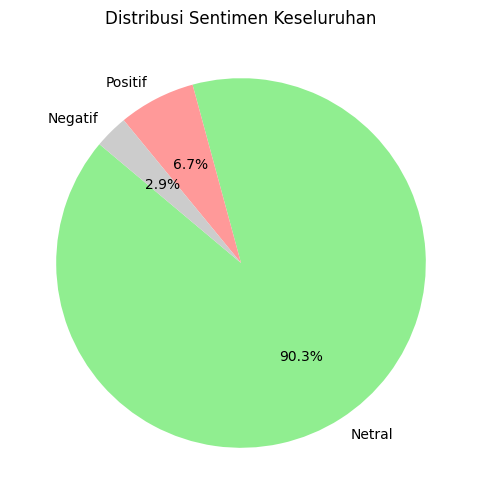


Distribusi Sentimen untuk Aspek: Performa
performa
Netral     3415
Positif     258
Negatif     108
Name: count, dtype: int64


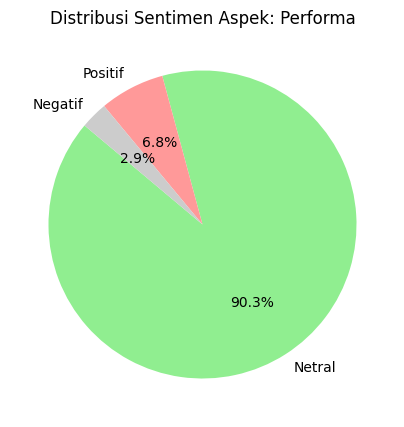


Distribusi Sentimen untuk Aspek: Desain
desain
Netral     3313
Positif     355
Negatif     113
Name: count, dtype: int64


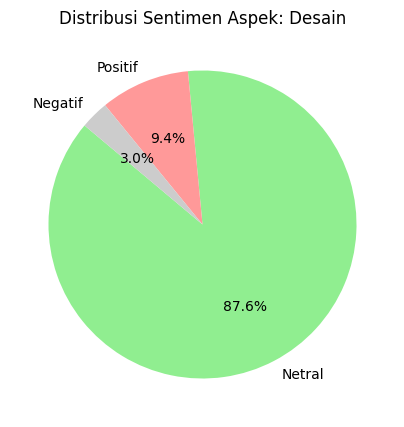


Distribusi Sentimen untuk Aspek: Harga
harga
Netral     3383
Positif     235
Negatif     163
Name: count, dtype: int64


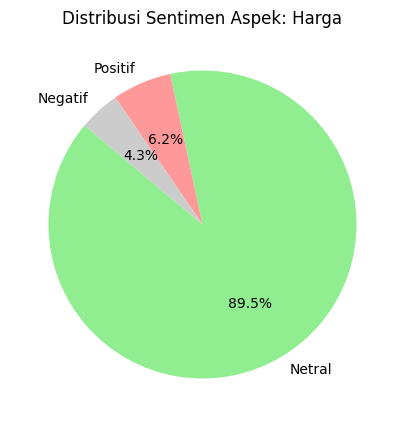


Distribusi Sentimen untuk Aspek: Teknologi
teknologi
Netral     3338
Positif     328
Negatif     115
Name: count, dtype: int64


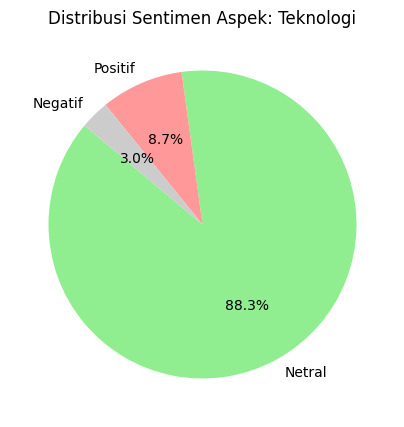


Distribusi Sentimen untuk Aspek: Baterai
baterai
Netral     3477
Positif     189
Negatif     115
Name: count, dtype: int64


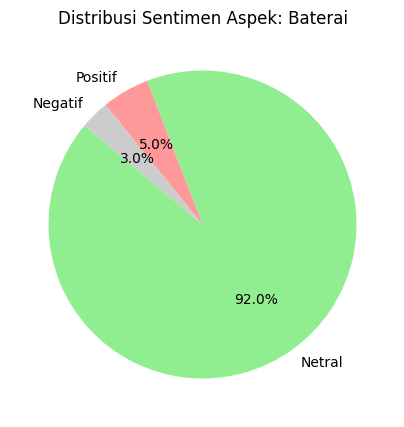


Distribusi Sentimen untuk Aspek: Kenyamanan
kenyamanan
Netral     3567
Positif     160
Negatif      54
Name: count, dtype: int64


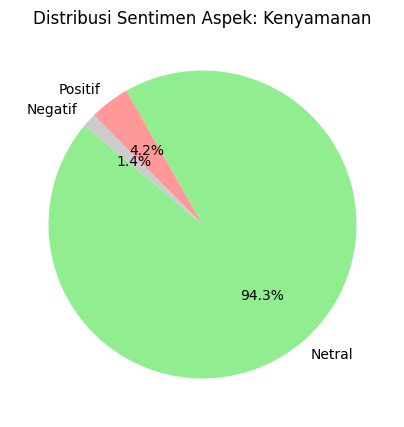

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# =======================
# 1. Baca File CSV
# =======================
file_path = 'data.mobil.csv'  # Ganti sesuai path file kamu
df = pd.read_csv(file_path)

# =======================
# 2. Daftar Aspek
# =======================
aspek_list = ['performa', 'desain', 'harga', 'teknologi', 'baterai', 'kenyamanan']

# Filter kolom yang benar-benar ada di DataFrame
existing_aspek_cols = [col for col in aspek_list if col in df.columns]

# =======================
# 3. Distribusi Sentimen Keseluruhan
# =======================
if existing_aspek_cols:
    # Gabungkan semua label aspek ke satu Series
    all_labels = pd.concat([df[col] for col in existing_aspek_cols], axis=0)

    # Hitung distribusi total
    total_dist = all_labels.value_counts()

    print("Distribusi Sentimen Keseluruhan:")
    print(total_dist)

    # Pie Chart Keseluruhan
    plt.figure(figsize=(6, 6))
    total_dist.plot(kind='pie', autopct='%1.1f%%', startangle=140,
                    colors=['#90EE90', '#FF9999', '#CCCCCC'])  # Hijau, Merah, Abu
    plt.title("Distribusi Sentimen Keseluruhan")
    plt.ylabel('')
    plt.show()
else:
    print("Tidak ditemukan kolom aspek untuk menghitung distribusi keseluruhan.")

# =======================
# 4. Distribusi Sentimen per Aspek
# =======================
for aspek in aspek_list:
    if aspek in df.columns:
        dist = df[aspek].value_counts()
        print(f"\nDistribusi Sentimen untuk Aspek: {aspek.capitalize()}")
        print(dist)

        plt.figure(figsize=(5, 5))
        dist.plot(kind='pie', autopct='%1.1f%%', startangle=140,
                  colors=['#90EE90', '#FF9999', '#CCCCCC'])  # Hijau, Merah, Abu
        plt.title(f"Distribusi Sentimen Aspek: {aspek.capitalize()}")
        plt.ylabel('')
        plt.show()
    else:
        print(f"Kolom '{aspek}' tidak ditemukan dalam data.")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset (ganti nama file sesuai dengan file CSV kamu)
df = pd.read_csv("data.mobil.csv", encoding='ISO-8859-1')

# Kolom-kolom yang akan disimpan setelah split
cols_to_save = [
    'publishedAt', 'authorDisplayName', 'textDisplay', 'likeCount',
    'cleaned', 'lower', 'tokens', 'stemmed', 'filtered', 'preprocessed',
    'performa', 'desain', 'teknologi', 'harga', 'baterai', 'kenyamanan'
]

# Filter hanya kolom yang diperlukan
df = df[cols_to_save]

# Cek distribusi kelas per aspek sebelum splitting
print("Distribusi kelas sebelum splitting:")
print(df[['performa', 'desain', 'teknologi', 'harga', 'baterai', 'kenyamanan']].apply(pd.Series.value_counts))

# Split data 70% train, 30% sisanya
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)

# Split 30% sisanya ke validation 20% dan test 10%
val_df, test_df = train_test_split(temp_df, test_size=1/3, random_state=42)

# Simpan hasil split ke CSV
train_df.to_csv("train.csv", index=False)
val_df.to_csv("val.csv", index=False)
test_df.to_csv("test.csv", index=False)

# Tampilkan jumlah data per split
print("\nData telah dibagi dan disimpan dalam file:")
print(f" - train.csv : {len(train_df)} baris")
print(f" - val.csv   : {len(val_df)} baris")
print(f" - test.csv  : {len(test_df)} baris")


Distribusi kelas sebelum splitting:
         performa  desain  teknologi  harga  baterai  kenyamanan
Netral       3415    3313       3338   3383     3477        3567
Positif       258     355        328    235      189         160
Negatif       108     113        115    163      115          54

Data telah dibagi dan disimpan dalam file:
 - train.csv : 2646 baris
 - val.csv   : 756 baris
 - test.csv  : 379 baris
